#Osteoarthritis Detection Using Deep Learning

<br>**Problem Statement 2**</br>
An orthopaedist is a medical doctor specializing in diagnosing and treating disorders related to the skeletal system. Part of their job is to distinguish between a healthy person and a person with Osteoarthritis by looking at their knee X-ray images.

**Osteoarthritis:** Osteoarthritis, commonly known as wear-and-tear arthritis, is a condition in which the natural cushioning between joints — cartilage — wears away. When this happens, the bones of the joints rub more closely against one another with less of the shock-absorbing benefits of cartilage. The rubbing results in pain, swelling, stiffness, decreased ability to move, and, sometimes, the formation of bone spurs.



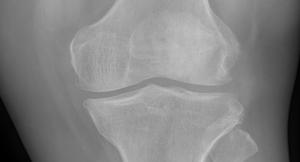
        **Healthy Knee Joint**




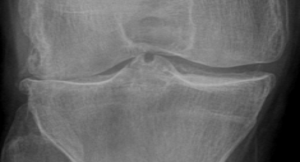
      **Osteoarthritis Condition**

You have to create a deep learning model that can detect if osteoarthritis is present or not in a given knee X-ray image.

**Dataset**

The Dataset contains three folders 



> Test (845 images)-->
> Train (2350 images)-->
> Valid (641 images)



The train is a dataset that you will use to train your model.

The test is a dataset that you will use to test your model and find out the accuracy and confusion matrix.

Each of these folders has two folders 

**Test**

*   Normal
*   Osteoarthritis


**Train**
*   Normal
*   Osteoarthritis

**Valid**
*   Normal
*   Osteoarthritis


**Task**

Your task is to create a deep learning model that can provide the probability of having osteoarthritis for a given knee X-ray image.

Dataset: 

https://drive.google.com/drive/folders/1y7AO4RHDLYYvjGMlZX2NBTpSFWho1Jyg?usp=sharing



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
labels = ['Osteoarthritis', 'Normal']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = get_training_data('/content/drive/MyDrive/train')
test = get_training_data('/content/drive/MyDrive/test')
val = get_training_data('/content/drive/MyDrive/Valid')

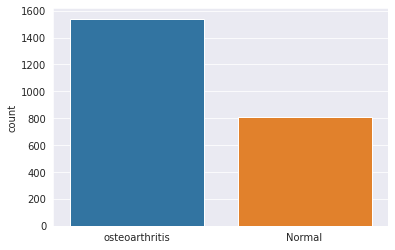

In [ ]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("osteoarthritis")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l) 

Text(0.5, 1.0, 'Normal')

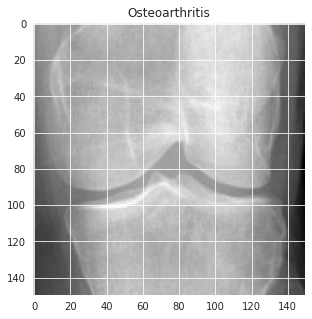

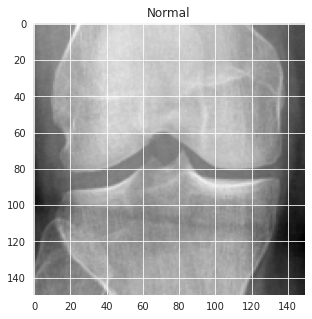

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

In [ ]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [ ]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [ ]:
# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 75, 75, 64)       2

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [ ]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 12 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

Epoch 1/12
74/74 [==============================] - 145s 2s/step - loss: 1.1915 - accuracy: 0.6187 - val_loss: 0.6877 - val_accuracy: 0.5679 - lr: 0.0010
Epoch 2/12
74/74 [==============================] - 139s 2s/step - loss: 0.6258 - accuracy: 0.6353 - val_loss: 0.6293 - val_accuracy: 0.6599 - lr: 0.0010
Epoch 3/12
74/74 [==============================] - 140s 2s/step - loss: 0.5981 - accuracy: 0.6626 - val_loss: 0.8036 - val_accuracy: 0.6724 - lr: 0.0010
Epoch 4/12
74/74 [==============================] - 138s 2s/step - loss: 0.5611 - accuracy: 0.6515 - val_loss: 1.1273 - val_accuracy: 0.4041 - lr: 0.0010
Epoch 5/12
74/74 [==============================] - ETA: 0s - loss: 0.5220 - accuracy: 0.6966
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
74/74 [==============================] - 160s 2s/step - loss: 0.5220 - accuracy: 0.6966 - val_loss: 0.6244 - val_accuracy: 0.6131 - lr: 0.0010
Epoch 6/12
74/74 [==============================] - 140s 2s/step - loss

In [ ]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

27/27 [==============================] - 10s 361ms/step - loss: 4.0848 - accuracy: 0.3728
Loss of the model is -  4.084834575653076
27/27 [==============================] - 10s 359ms/step - loss: 4.0848 - accuracy: 0.3728
Accuracy of the model is -  37.278106808662415 %


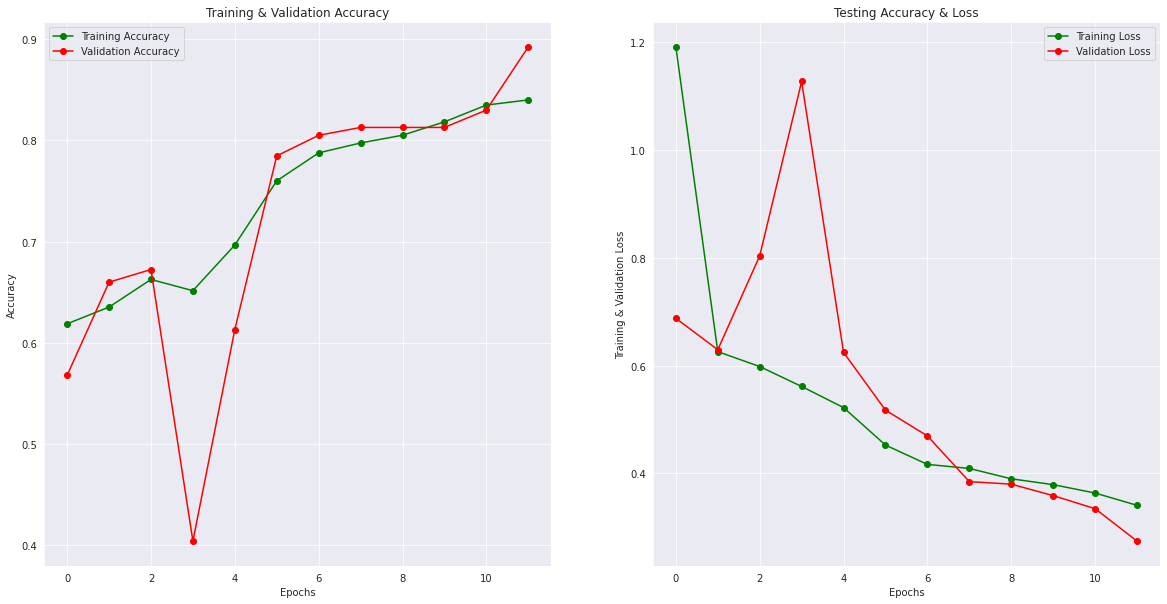

In [ ]:
epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [ ]:
predictions = model.predict(x_test) 
predictions = np.argmax(predictions,axis=1)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
print(classification_report(y_test, predictions, target_names = ['osteoarthritis (Class 0)','Normal (Class 1)']))

                          precision    recall  f1-score   support

osteoarthritis (Class 0)       0.33      1.00      0.49       276
        Normal (Class 1)       0.00      0.00      0.00       569

                accuracy                           0.33       845
               macro avg       0.16      0.50      0.25       845
            weighted avg       0.11      0.33      0.16       845



In [ ]:
cm = confusion_matrix(y_test,predictions)
cm

array([[276,   0],
       [569,   0]])

In [ ]:
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])

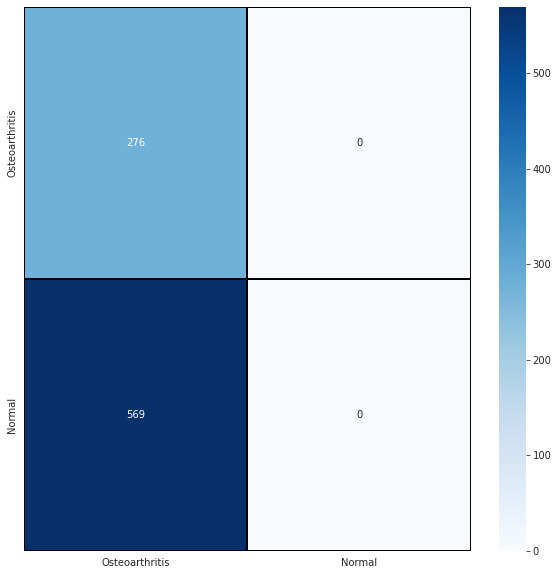

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

In [ ]:
correct = np.nonzero(predictions == y_test)[0]
incorrect = np.nonzero(predictions != y_test)[0]

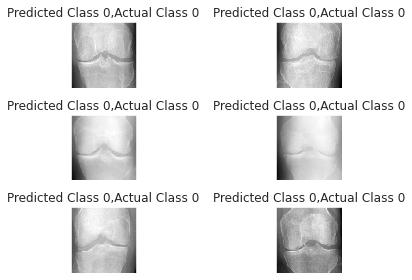

In [ ]:
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

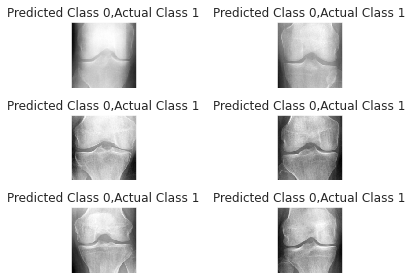

In [ ]:
i = 0
for c in incorrect[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1